#Leaf Classification
The objective of this playground competition is to use extracted features, including shape, margin & texture, to accurately identify 99 species of plants. Leaves, due to their volume, prevalence, and unique characteristics, are an effective means of differentiating plant species.

## importing libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import merge
from keras.layers import Dense, Dropout, Activation, Flatten
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import cv2 as cv
import os
import seaborn as sns
from keras.preprocessing.image import load_img
from sklearn.metrics import log_loss
from keras.regularizers import l2
from keras import regularizers
from tensorflow.keras.optimizers import  SGD, Adam, RMSprop

## Read data from the CSV file

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
data = pd.read_csv('train.csv',index_col='id')
test_ = pd.read_csv('test.csv',index_col=False)

In [4]:
data

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,,,,,,,,,,,,,,,,,,,,,
1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,Magnolia_Salicifolia,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,0.001953,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
1578,Acer_Pictum,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,0.029297,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
1581,Alnus_Maximowiczii,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,0.003906,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953


In [5]:
test_

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.000000,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.000000,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.000000,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.000000,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.000000,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,1576,0.000000,0.000000,0.003906,0.015625,0.041016,0.000000,0.017578,0.000000,0.005859,...,0.098633,0.000000,0.004883,0.000000,0.003906,0.0,0.0,0.018555,0.000000,0.000977
590,1577,0.000000,0.003906,0.003906,0.005859,0.017578,0.000000,0.017578,0.005859,0.000000,...,0.012695,0.004883,0.004883,0.002930,0.009766,0.0,0.0,0.090820,0.000000,0.016602
591,1579,0.017578,0.029297,0.015625,0.013672,0.003906,0.015625,0.025391,0.000000,0.000000,...,0.073242,0.000000,0.028320,0.000000,0.001953,0.0,0.0,0.000000,0.042969,0.006836
592,1580,0.013672,0.009766,0.060547,0.025391,0.035156,0.025391,0.039062,0.000000,0.003906,...,0.003906,0.000000,0.000977,0.000000,0.011719,0.0,0.0,0.000000,0.011719,0.018555


## Describe data

In [6]:
data.describe()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,0.018639,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,0.016071,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,0.005859,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,0.015625,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,0.027344,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,0.097656,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 1 to 1584
Columns: 193 entries, species to texture64
dtypes: float64(192), object(1)
memory usage: 1.5+ MB


In [8]:
#check if there is null values
data.isnull().sum()

species      0
margin1      0
margin2      0
margin3      0
margin4      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 193, dtype: int64

In [9]:
#check if there is duplicate in data
data.duplicated().sum()

0

In [10]:
#display no. of unique values in species column
n=data['species'].nunique()

## Visualize the data

In [11]:
data_cor=data.drop(columns=['species'])

<function matplotlib.pyplot.show(close=None, block=None)>

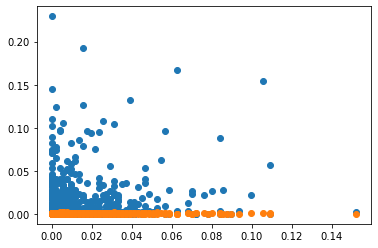

In [12]:
#split columns to three parts(margin,shape,texture) to visualize it and calculate correlation
data_marg=data_cor.iloc[:,:64]
data_texture=data_cor.iloc[:,64:128]
data_shape=data_cor.iloc[:,128:]

plt.scatter(x=data_marg[1:10],y=data_shape[1:10])
plt.scatter(x=data_marg[1:10],y=data_texture[1:10])
plt.show

C:\Users\Lenovo\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='margin1', ylabel='shape1'>

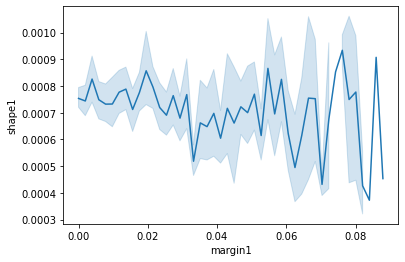

In [13]:
sns.lineplot( data['margin1'], data['shape1'])

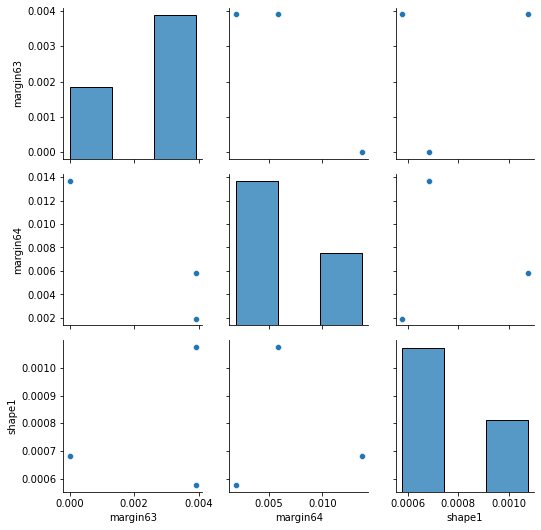

In [14]:
g = sns.PairGrid(data.iloc[10:13,63:66])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

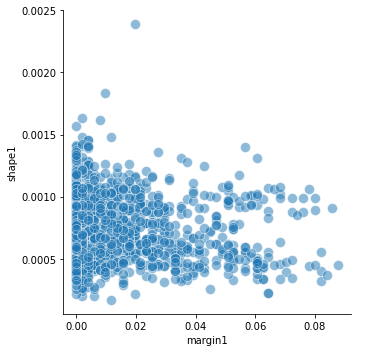

In [15]:
g = sns.FacetGrid(data,height=5) #hue="species", height=5)
g.map(sns.scatterplot, "margin1", "shape1", s=100, alpha=.5)
g.add_legend()

## Draw some of the images 

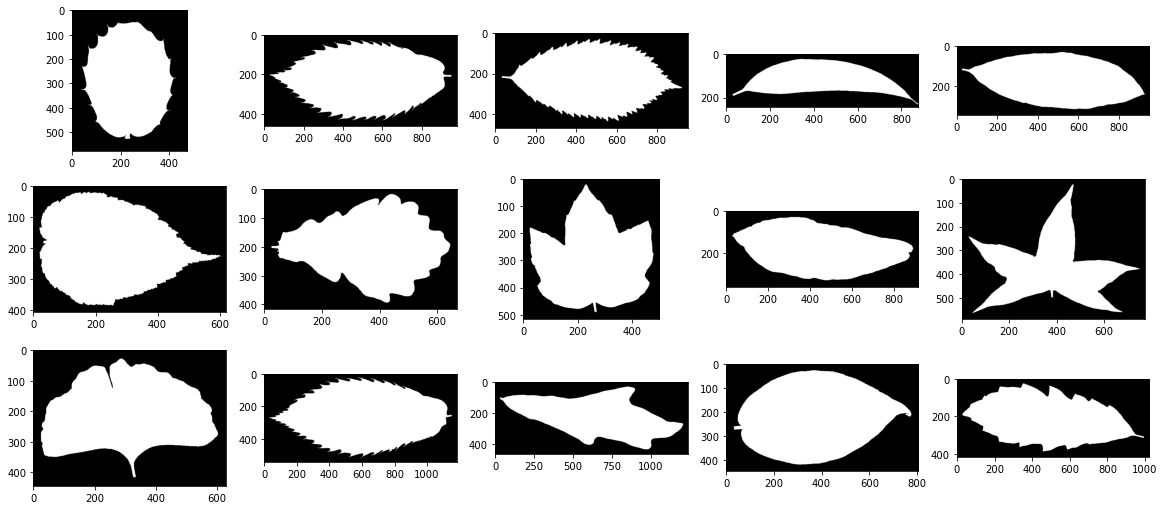

In [16]:
# draw 15 random images
plt.figure(figsize=(20,15))
for i in range(15):
   file=np.random.choice((os.listdir('D:\images')))
   plt.subplot(5,5,i+1) # 5 images in each row
   img=load_img(os.path.join('D:\images',file))
   plt.imshow(img)

## Correlation analysis

In [17]:
#correlation between margin columns
correlation_1= data_marg.corr()
correlation_1.style.background_gradient(cmap='coolwarm')

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin40,margin41,margin42,margin43,margin44,margin45,margin46,margin47,margin48,margin49,margin50,margin51,margin52,margin53,margin54,margin55,margin56,margin57,margin58,margin59,margin60,margin61,margin62,margin63,margin64
margin1,1.000000,0.806390,-0.182829,-0.297807,-0.475874,0.767718,0.066273,-0.094137,-0.181496,0.397138,0.737461,-0.528224,0.489317,-0.370460,-0.540974,-0.072127,0.316704,0.283239,-0.234398,0.325947,-0.433734,-0.404022,-0.142871,-0.315616,-0.452295,-0.190360,-0.361443,-0.558431,0.079726,-0.246912,-0.449652,-0.378156,0.597343,-0.176148,0.727001,0.687178,-0.078347,-0.465053,-0.524927,-0.462596,-0.328406,0.192857,-0.276215,-0.440570,0.055598,-0.480332,-0.504002,-0.355574,-0.395037,-0.378164,0.716222,-0.212405,-0.362571,-0.442415,-0.215142,-0.429318,0.279170,0.260683,-0.217283,-0.150934,-0.178541,-0.315746,0.440114,-0.267353
margin2,0.806390,1.000000,-0.204640,-0.315953,-0.444312,0.825762,-0.083273,-0.086428,-0.120276,0.162587,0.805064,-0.489808,0.647166,-0.316377,-0.503059,-0.068356,0.135000,0.345410,-0.226020,0.062345,-0.421253,-0.364703,-0.136586,-0.302345,-0.397290,-0.342079,-0.316699,-0.544266,0.071445,-0.364163,-0.402669,-0.330662,0.373034,-0.155309,0.536119,0.633975,-0.184035,-0.453749,-0.506080,-0.426021,-0.296884,0.172124,-0.267924,-0.480890,0.027551,-0.439758,-0.474808,-0.343822,-0.345661,-0.372514,0.810824,-0.197470,-0.435561,-0.397171,-0.262892,-0.389124,0.010321,0.260829,-0.216703,-0.113863,-0.168219,-0.286604,0.325263,-0.231041
margin3,-0.182829,-0.204640,1.000000,0.120042,-0.185007,-0.163976,0.095449,0.024350,-0.000042,0.008772,-0.261371,-0.004085,-0.048698,0.095701,0.050113,-0.054076,-0.130220,-0.092062,-0.164152,0.012338,0.042328,-0.282862,-0.145334,-0.255676,-0.116910,0.040840,-0.209353,0.150049,0.246209,0.054936,-0.304381,-0.292799,-0.133807,-0.045337,-0.068513,-0.187569,0.680851,0.586314,0.079533,-0.109956,-0.212086,-0.162344,0.118390,0.037876,-0.048053,-0.197011,0.219074,0.065533,-0.218687,-0.113363,-0.149119,-0.146505,-0.019346,-0.158799,0.097771,-0.234731,0.071139,-0.163235,0.475615,-0.193771,-0.026549,-0.240234,0.433042,-0.066579
margin4,-0.297807,-0.315953,0.120042,1.000000,0.029480,-0.261437,-0.268271,-0.047693,0.227543,-0.173986,-0.172503,-0.202576,-0.238041,0.338136,-0.259813,-0.021615,-0.047704,0.093686,0.362009,0.056523,-0.138539,-0.194713,-0.004602,-0.144124,0.031567,0.076747,-0.120713,0.442599,0.467451,0.264924,-0.167772,-0.105741,-0.048612,-0.094700,-0.265846,-0.193072,0.090006,-0.004696,-0.211244,-0.202604,0.158903,0.398132,-0.199267,0.091060,0.531758,-0.142954,-0.099247,-0.305530,-0.015934,-0.176940,-0.311811,-0.059443,-0.075448,0.032300,-0.246734,-0.218347,0.017273,0.405733,0.715344,0.376115,0.006269,-0.147651,-0.178366,0.018198
margin5,-0.475874,-0.444312,-0.185007,0.029480,1.000000,-0.438587,-0.108178,0.056557,0.196745,-0.320647,-0.514981,0.373683,-0.463328,0.095697,0.467991,0.081766,-0.235063,-0.431084,0.358065,-0.326563,0.066151,0.273729,0.287659,0.125076,0.331684,0.194088,0.259560,0.655811,-0.444565,0.329904,0.701231,0.648256,-0.454494,0.128827,-0.448611,-0.455533,-0.236137,0.233060,0.510793,0.637497,0.805544,-0.319346,-0.106726,0.652104,-0.386897,0.826900,0.231276,0.050970,0.647367,0.033388,-0.501838,0.136569,0.348237,0.792451,0.047905,0.407380,-0.263733,-0.434640,-0.198879,0.423417,0.092988,0.191698,-0.496715,0.116804
margin6,0.767718,0.825762,-0.163976,-0.261437,-0.438587,1.000000,-0.093780,-0.112896,-0.136961,0.215141,0.686998,-0.479464,0.539807,-0.317465,-0.489144,-0.065768,0.120157,0.256036,-0.267886,0.159341,-0.414130,-0.363723,-0.126238,-0.312633,-0.390545,-0.305049,-0.313253,-0.528369,0.064964,-0.251711,-0.400837,-0.332077,0.

In [18]:
#correlation between shape columns
correlation_2= data_texture.corr()
correlation_2.style.background_gradient(cmap='coolwarm')

,shape1,shape2,shape3,shape4,shape5,shape6,shape7,shape8,shape9,shape10,shape11,shape12,shape13,shape14,shape15,shape16,shape17,shape18,shape19,shape20,shape21,shape22,shape23,shape24,shape25,shape26,shape27,shape28,shape29,shape30,shape31,shape32,shape33,shape34,shape35,shape36,shape37,shape38,shape39,shape40,shape41,shape42,shape43,shape44,shape45,shape46,shape47,shape48,shape49,shape50,shape51,shape52,shape53,shape54,shape55,shape56,shape57,shape58,shape59,shape60,shape61,shape62,shape63,shape64
shape1,1.000000,0.988172,0.963959,0.928501,0.877043,0.810337,0.729520,0.638556,0.547738,0.462729,0.391156,0.331743,0.280721,0.234380,0.197173,0.179156,0.175001,0.178117,0.193045,0.223111,0.266851,0.321176,0.384844,0.460677,0.538615,0.621405,0.707137,0.780283,0.834913,0.869443,0.890415,0.902530,0.909305,0.907456,0.896705,0.878484,0.841545,0.788837,0.719757,0.635105,0.543286,0.460045,0.389890,0.330367,0.279610,0.237048,0.205716,0.184058,0.174217,0.182411,0.204105,0.239573,0.282949,0.336137,0.405195,0.488552,0.579090,0.674746,0.764713,0.839619,0.899469,0.940542,0.968368,0.988632
shape2,0.988172,1.000000,0.989348,0.962662,0.919347,0.860438,0.786173,0.700551,0.612557,0.530194,0.460269,0.400745,0.348215,0.299475,0.258991,0.238142,0.230393,0.229172,0.240131,0.266172,0.304890,0.355589,0.415535,0.487617,0.560949,0.638416,0.719010,0.787743,0.837526,0.867348,0.884491,0.895032,0.906857,0.916254,0.915811,0.906811,0.878903,0.834440,0.773378,0.695635,0.608548,0.528106,0.459434,0.399603,0.347411,0.302182,0.268362,0.243729,0.230935,0.235754,0.253171,0.284107,0.323504,0.371989,0.436357,0.514646,0.599656,0.689923,0.773647,0.843228,0.896762,0.931919,0.953427,0.969233
shape3,0.963959,0.989348,1.000000,0.988259,0.956976,0.909099,0.844374,0.766872,0.684679,0.607447,0.541045,0.483116,0.430528,0.380759,0.337979,0.314351,0.303171,0.298319,0.305503,0.326786,0.360035,0.405300,0.460037,0.526337,0.593203,0.663232,0.735812,0.796961,0.839075,0.862309,0.873834,0.881142,0.894654,0.913384,0.923012,0.924763,0.909587,0.877945,0.828892,0.761518,0.682996,0.607654,0.542001,0.483269,0.430573,0.383653,0.347683,0.320265,0.304349,0.305393,0.318612,0.344721,0.379192,0.422398,0.480511,0.552228,0.630278,0.712478,0.786576,0.848003,0.892986,0.920399,0.933826,0.944059
shape4,0.928501,0.962662,0.988259,1.000000,0.987085,0.953611,0.902544,0.837043,0.763955,0.694599,0.634064,0.579892,0.528731,0.479283,0.434964,0.408824,0.394522,0.386020,0.388955,0.404490,0.431344,0.470069,0.517762,0.575806,0.633151,0.692221,0.752219,0.800632,0.831846,0.846134,0.850554,0.852663,0.866108,0.893410,0.915180,0.930014,0.930583,0.914861,0.880469,0.826207,0.759448,0.692621,0.632602,0.578021,0.527690,0.481108,0.443928,0.414368,0.395600,0.392646,0.401590,0.422812,0.452110,0.488642,0.538664,0.601079,0.668467,0.739285,0.800567,0.850803,0.884192,0.901089,0.905258,0.909143
shape5,0.877043,0.919347,0.956976,0.987085,1.000000,0.986204,0.949721,0.897174,0.835811,0.777048,0.724062,0.675056,0.626991,0.579086,0.534073,0.505659,0.488360,0.476500,0.475802,0.485765,0.505115,0.534891,0.572699,0.620165,0.665132,0.710630,0.755806,0.790449,0.809179,0.813474,0.809556,0.806067,0.819229,0.854220,0.887627,0.916019,0.933069,0.935838,0.918539,0.879931,0.827377,0.771837,0.719949,0.670421,0.623567,0.578542,0.541323,0.510324,0.488790,0.482336,0.487149,0.503330,0.526399,0.554967,0.595437,0.646062,0.699761,0.755983,0.801383,0.838388,0.858274,0.863891,0.858605,0.856982
shape6,0.810337,0.860438,0.909099,0.953611,0.986204,1.000000,0.985029,0.948797,0.900984,0.853495,0.808764,0.765253,0.722069,0.677447,0.634156,0.605016,0.585326,0.571170,0.567287,0.571993,0.584371,0.605331,0.632288,0.666720,0.696714,0.725756,0.753499,0.771723,0.775315,0.767554,0.754265,0.743921,0.756103,0.798085,0.841632,0.883863,0.918249,0.940502,0.943061,0.922629,0.885876,0.842951,0.800757,0.757955,0.715995,0.674089,0.638245,0.606645,0.583174,0.574267,0.576417,0.588313,0.605442,0.626522,0.656198,0.693468,0.730351,0.768153,0.794075,0.812828,0.816432,0.810602,0.796615,0.78994

In [19]:
#correlation between texture columns
correlation_3= data_shape.corr()
correlation_3.style.background_gradient(cmap='coolwarm')

,texture1,texture2,texture3,texture4,texture5,texture6,texture7,texture8,texture9,texture10,texture11,texture12,texture13,texture14,texture15,texture16,texture17,texture18,texture19,texture20,texture21,texture22,texture23,texture24,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
texture1,1.000000,-0.067151,-0.079916,-0.115160,-0.143009,-0.006856,0.637527,-0.103354,-0.068936,0.182971,-0.191534,-0.095996,-0.065275,-0.146961,-0.091601,-0.104101,-0.075651,0.009695,0.028813,-0.035731,-0.043882,-0.179900,-0.075447,-0.181901,-0.014931,-0.205322,0.151663,-0.060415,-0.156303,-0.046332,-0.118982,-0.120168,-0.138934,0.512418,-0.077784,-0.058982,-0.153731,0.307942,0.303962,0.192412,-0.083446,-0.138672,0.017063,0.139503,0.000816,0.178798,0.077746,-0.118841,-0.225596,-0.166001,-0.151198,-0.143427,-0.199080,-0.056336,0.088055,-0.097203,0.164526,-0.189653,-0.156847,-0.112472,-0.029803,-0.190008,-0.090583,0.364567
texture2,-0.067151,1.000000,0.260208,-0.065309,0.110914,0.259064,-0.041552,0.355421,0.390843,-0.153474,-0.297511,-0.051997,0.289092,0.043459,-0.118523,-0.080496,0.824150,0.280289,-0.160725,0.654358,-0.114505,-0.221674,0.500207,-0.037903,0.076574,-0.171628,-0.148729,0.121626,0.046346,0.352590,0.081646,-0.195532,-0.158938,-0.012990,0.260375,-0.118925,-0.174961,0.085162,-0.114395,-0.077564,-0.111175,-0.096005,-0.025288,-0.116776,0.338704,0.099711,0.196810,0.074666,-0.055972,-0.093213,-0.226390,-0.137866,-0.072047,-0.114307,-0.024664,-0.151590,0.186293,-0.102880,0.294077,-0.141218,-0.121736,-0.243517,0.086803,-0.072817
texture3,-0.079916,0.260208,1.000000,-0.346551,0.283067,0.053647,-0.058573,0.539535,0.079338,-0.296885,-0.194256,0.013793,0.358067,0.154679,-0.145346,0.203950,0.124645,0.461063,-0.326912,0.623135,0.256334,0.211741,0.080478,-0.326700,0.003860,-0.347587,-0.137027,0.744791,0.018878,0.485121,-0.118588,0.279845,-0.280845,0.049767,0.739731,0.379262,-0.270084,0.247928,-0.205590,-0.320888,-0.178082,0.269718,-0.061665,-0.063897,0.129708,0.388782,0.212163,0.328743,-0.020828,0.075196,-0.121326,0.363704,-0.387990,-0.258524,0.047347,-0.034369,0.208997,-0.304740,0.040444,-0.181973,0.275601,-0.272880,0.107869,0.117977
texture4,-0.115160,-0.065309,-0.346551,1.000000,-0.391381,-0.025297,-0.039472,-0.395623,-0.077532,0.502083,-0.034814,-0.224281,-0.077470,-0.061095,-0.087018,-0.059636,0.021935,-0.114216,0.470626,-0.240429,-0.111366,-0.128724,-0.086489,0.525124,0.394032,0.091502,0.115431,-0.286562,-0.120326,-0.053403,0.005587,-0.125720,0.446796,-0.285726,-0.198525,-0.120425,0.129158,-0.348113,0.406745,0.623153,0.323803,-0.091337,0.393268,-0.073564,-0.121280,-0.381425,0.013625,-0.324860,0.032022,-0.150279,-0.068667,-0.091262,0.597373,0.195606,-0.290311,-0.072844,-0.254080,-0.018632,0.183791,-0.098065,-0.106833,-0.011305,0.039765,-0.025903
texture5,-0.143009,0.110914,0.283067,-0.391381,1.000000,-0.115666,-0.098108,0.666504,-0.166864,-0.315068,-0.163053,0.533221,-0.041135,-0.146472,-0.129459,-0.031689,0.033355,0.159315,-0.301404,0.261506,0.023519,-0.050654,0.225865,-0.317188,-0.301288,-0.315330,-0.192615,0.343144,-0.087577,0.016727,-0.040302,0.064155,-0.257083,0.226068,0.185170,0.043715,-0.237364,0.401985,-0.340393,-0.334133,-0.208961,-0.060924,-0.256430,-0.061750,0.318534,0.463001,0.020197,0.701218,-0.289826,-0.078725,-0.127018,-0.011500,-0.391402,-0.198264,0.444334,-0.053821,0.386906,-0.291125,-0.264114,-0.156409,0.047808,-0.241493,-0.180592,-0.202695
texture6,-0.006856,0.259064,0.053647,-0.025297,-0.115666,1.000000,-0.036564,-0.038280,0.322471,-0.053668,-0.143952,-0.128129,0.678544,-0.000225,-0.056789,-0.143786,0.294335,0.119335,-0.118006,0.097320,-0.129996,-0.193398,0.123159,0.006760,0.096198,-0

In [20]:
#from correlation matrix we saw useless columns so we'll drop it
data.drop(columns=['shape27','shape39' ,'shape28', 'shape29', 'shape30', 'shape31', 'shape32','shape33','shape34','shape35',
                'shape36','shape37','shape38', 'shape2',   'shape3',  'shape4',  'shape5',  'shape6', 'shape7','shape8','shape58',
                'shape59','shape60','shape61',  'shape62', 'shape63',  'shape64','margin1', 'margin6','margin11','margin35','margin51',
                'texture17','texture35','texture28','texture48'],inplace=True)

test_.drop(columns=['shape27','shape39' ,'shape28', 'shape29', 'shape30', 'shape31', 'shape32','shape33','shape34','shape35',
                'shape36','shape37','shape38', 'shape2',   'shape3',  'shape4',  'shape5',  'shape6', 'shape7','shape8','shape58',
                'shape59','shape60','shape61',  'shape62', 'shape63',  'shape64','margin1', 'margin6','margin11','margin35','margin51',
                'texture17','texture35','texture28','texture48'],inplace=True)

In [21]:
index = test_.pop('id')

In [22]:
index

0         4
1         7
2         9
3        12
4        13
       ... 
589    1576
590    1577
591    1579
592    1580
593    1583
Name: id, Length: 594, dtype: int64

In [23]:
#test_d=test_.drop(columns='id')

In [24]:
x= data.values[:,data.columns!='species']
#y=data['species']
y = LabelEncoder().fit_transform(data['species'])

In [25]:
data.shape,test_.shape, x.shape, y.shape

((990, 157), (594, 156), (990, 156), (990,))

## check if there is need to standardize the data

In [26]:
mean=x.mean()
standard_deviation=x.std()
zscores = [(value - mean) / standard_deviation for value in x]
#print(zscores)

In [27]:
#rescale train data to be simpler
sc = StandardScaler()
x= sc.fit_transform(x)
# rescale test data
test_ = sc.fit_transform(test_)

## split train data into 80% for training  and 20% for testing

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
#display shapes
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(792, 156) (198, 156) (792,) (198,)


## Build model

In [30]:
def scheduler(epoch, lr):
   if epoch < 10:
     return lr
   else:
     return lr * tf.math.exp(-0.1)

In [31]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [32]:
#build model function
def model_(nerons,l_2,dropOut,opti,epoch,batchSize,lr):
  model = Sequential()
  model.add(Dense(nerons,input_dim=156, kernel_initializer='glorot_normal', activation='tanh',kernel_regularizer=regularizers.l2(l_2)))
  model.add(Dropout(dropOut))
  model.add(Dense(99, activation='softmax'))
  
  model.compile(optimizer=opti, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  if lr==0:
    m=model.fit(x_train, y_train, epochs=epoch, batch_size=batchSize,verbose=0,callbacks=[callback] ,validation_data=(x_test,y_test))
  else:
    m=model.fit(x_train, y_train, epochs=epoch, batch_size=batchSize,verbose=0 ,validation_data=(x_test,y_test))

  loss, acc = model.evaluate(x_test, y_test)
  print(loss, acc)

  # ypred = model.predict(test_)
  # labels=sorted(data.species.unique())
  # yPred = pd.DataFrame(ypred,index=index,columns=labels)
  # yPred.to_csv('deeptest.csv', index=True)
  
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, epoch), m.history["loss"], label="train_loss")
  plt.plot(np.arange(0, epoch), m.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, epoch), m.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, epoch), m.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch ")
  plt.ylabel("Loss/Accuracy")
  plt.legend(loc="lower left")
  plt.savefig("plot1.png")

##Models with Adam Optimizer

7/7 [==============================] - 0s 5ms/step - loss: 0.2103 - accuracy: 0.9899
0.21033266186714172 0.9898989796638489


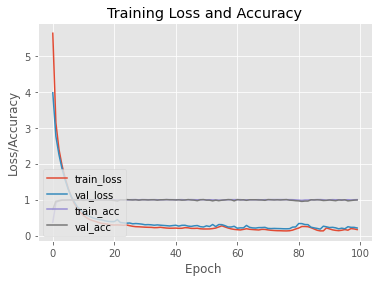

In [33]:
model_(1092,0.01,0.4,tf.keras.optimizers.Adam(learning_rate=0.001),100,32,0.001) #with default hyperparameters

7/7 [==============================] - 0s 4ms/step - loss: 0.4255 - accuracy: 0.9949
0.4254726767539978 0.9949495196342468


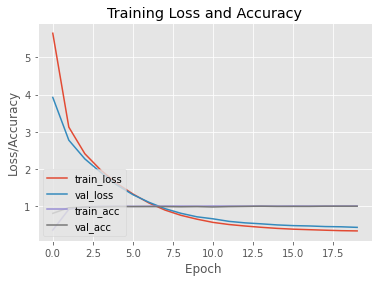

In [34]:
model_(1092,0.01,0.4,tf.keras.optimizers.Adam(),20,32,0) #with learning rate scheduler

7/7 [==============================] - 0s 3ms/step - loss: 388.0835 - accuracy: 0.5960
388.0834655761719 0.5959596037864685


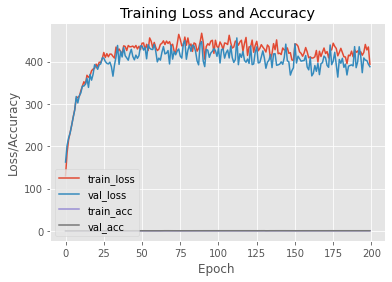

In [35]:
model_(800,0.1,0.4,tf.keras.optimizers.Adam(learning_rate=0.1),200,32,0.1)

7/7 [==============================] - 0s 3ms/step - loss: 0.2213 - accuracy: 0.9949
0.22126416862010956 0.9949495196342468


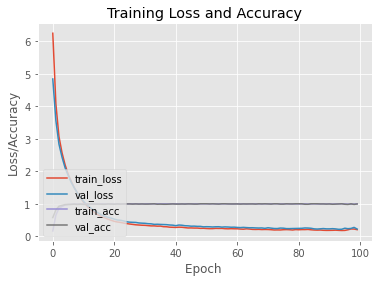

In [36]:
model_(600,0.01,0.6,tf.keras.optimizers.Adam(learning_rate=0.001),100,32,0.001)

## Models with SGD Optimizer

7/7 [==============================] - 0s 3ms/step - loss: 4.8842 - accuracy: 0.6919
4.88416862487793 0.691919207572937


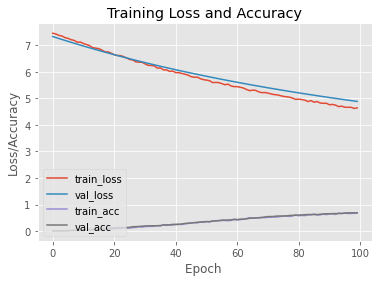

In [37]:
model_(800,0.01,0.4,tf.keras.optimizers.SGD(learning_rate=0.001),100,50,0.001) #with default hyperparameters

7/7 [==============================] - 0s 7ms/step - loss: 1.2503 - accuracy: 0.9040
1.2502567768096924 0.9040403962135315


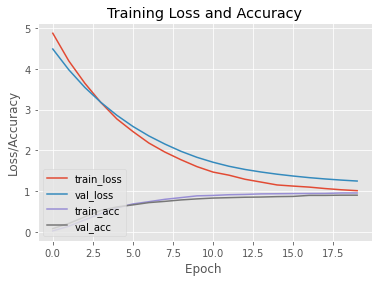

In [38]:
model_(1092,0.001,0.4,tf.keras.optimizers.SGD(),20,32,0) #with learning rate scheduler

7/7 [==============================] - 0s 3ms/step - loss: 0.3862 - accuracy: 0.9848
0.38617298007011414 0.9848484992980957


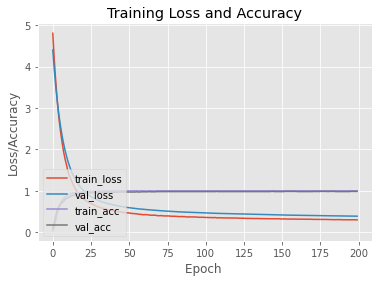

In [39]:
model_(1070,0.001,0.4,tf.keras.optimizers.SGD(learning_rate=0.01),200,32,0.01)

7/7 [==============================] - 0s 3ms/step - loss: 0.8040 - accuracy: 0.9899
0.8039537668228149 0.9898989796638489


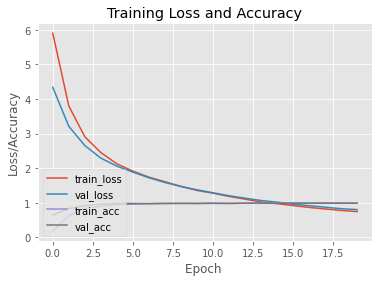

In [40]:
model_(400,0.01,0.6,tf.keras.optimizers.SGD(learning_rate=0.1),20,32,0.1)

## Models with RMSprop Optimizer


7/7 [==============================] - 0s 5ms/step - loss: 251.4851 - accuracy: 0.7727
251.4850616455078 0.7727272510528564


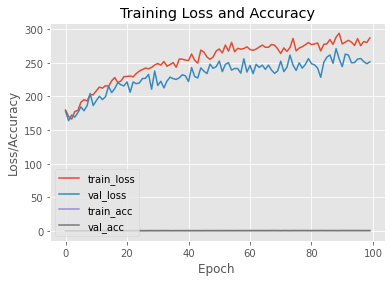

In [41]:
model_(1092,0.01,0.6,tf.keras.optimizers.RMSprop(learning_rate=0.1),100,32,0.1) #with default hyperparameters

7/7 [==============================] - 0s 5ms/step - loss: 0.2817 - accuracy: 0.9949
0.28169500827789307 0.9949495196342468


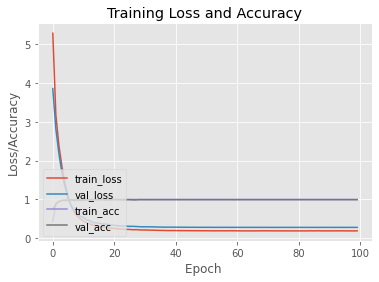

In [42]:
model_(900,0.01,0.4,tf.keras.optimizers.RMSprop(),100,32,0)

7/7 [==============================] - 0s 5ms/step - loss: 1.3529 - accuracy: 0.9545
1.3528574705123901 0.9545454382896423


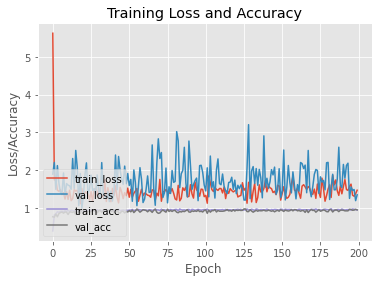

In [43]:
model_(1070,0.001,0.4,tf.keras.optimizers.RMSprop(learning_rate=0.01),200,32,0.01)

7/7 [==============================] - 0s 4ms/step - loss: 236.0693 - accuracy: 0.7222
236.0692596435547 0.7222222089767456


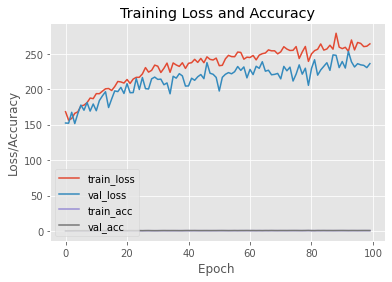

In [44]:
model_(1000,0.01,0.6,tf.keras.optimizers.RMSprop(learning_rate=0.1),100,32,0.1)